# Сборный проект №1

## Откроем файл с данными и изучем общую информацию

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


* основную информацию для датафрейма `data` с помощью метода `info()`

## Подготовим данные
### Заменим названия столбцов (приведем к нижнему регистру)

In [5]:
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.isna().sum()# подсчёт пропусков

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

* Данные в колонках 'year_of_release' можно преоброзовать в  формат datatime. 
* Данные в колонках 'critic_score' 'user_score' можно преоброзовать в  числовой тип. 
* Пропуски по годам незначительные. 
* Пропуски критиков и пользователей заменим на заглушки. 
* 'user_score' есть текст. Надо подробнее расмотреть
* Данные операции произведем ниже

### Преобразуем данные в нужные типы

In [7]:
data['critic_score'].unique()# уникальные значения в колоке оценка критиков (максимум 100)

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [8]:
data['critic_score'].isna().sum()#количество пропущенных значений оценка критиков

8578

In [9]:
data['critic_score'] = data['critic_score'].fillna(-1)# примем для отсутвующих значений оценки критиков "-1"
data['critic_score'] = data['critic_score'].astype(int)# преобразуем в тип int
data['critic_score'].unique()

array([76, -1, 82, 80, 89, 58, 87, 91, 61, 97, 95, 77, 88, 83, 94, 93, 85,
       86, 98, 96, 90, 84, 73, 74, 78, 92, 71, 72, 68, 62, 49, 67, 81, 66,
       56, 79, 70, 59, 64, 75, 60, 63, 69, 50, 25, 42, 44, 55, 48, 57, 29,
       47, 65, 54, 20, 53, 37, 38, 33, 52, 30, 32, 43, 45, 51, 40, 46, 39,
       34, 35, 41, 36, 28, 31, 27, 26, 19, 23, 24, 21, 17, 22, 13])

In [10]:
import datetime
data['year_of_release'].isna().sum()#количество пропущенных значений годе выпуска

269

In [11]:
data['year_of_release'].unique()# уникальные значения в годе выпуска

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [12]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)# удалим игры с пропущенными признаками года выпуска
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  int64  
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [13]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
#переводим столбец в формат datetime
data['year_of_release'] = data['year_of_release'].dt.year #вытягивает год из колонки

In [14]:
data['user_score'].unique()# уникальные значения в колоке оценка пользователей (максимум 10)

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [15]:
data[data['user_score'] == 'tbd'].groupby(
    ['year_of_release','platform','name']).agg(
    {'user_score':'count'}).sort_values(by='user_score', ascending=False).head(10)

user_score
year_of_release platform name                                                         
1997            PS       Elemental Gearbolt                                          1
2009            Wii      Cruise Ship Vacation Games                                  1
                         Dance Dance Revolution: Disney Grooves                      1
                         Deca Sports 2                                               1
                         Deer Drive                                                  1
                         Disney Sing It: Pop Hits                                    1
                         Diva Girls: Divas on Ice                                    1
                         Dodge Racing: Charger vs Challenger                         1
                         Don King Boxing                                             1
                         Dora the Explorer: Dora Saves the Crystal Kingdom           1

* Получается что 'tbd' означает to be determined: недостаточно пользовательских оценок для формирования рейтинга - можно заменить на '-2', а nan заменить на '-1'. Чтоб отличать эти значения
* Рейтиг переведем в 100 бальную шкалу 

In [16]:
data['user_score'] = data['user_score'].replace("tbd", -0.2) #присваиваем значению tbd = -0.2
data['user_score'] = data['user_score'].fillna(-0.1)#присваиваем значению nan = -0.1
data['user_score'] = data['user_score'].astype(float)#меняем тип на численные значения
data['user_score'] = data['user_score']*10#переводим десятиричный рейтинг в 100 бальный
data['user_score'] = data['user_score'].astype(int)#меняем тип на целые значения
data['user_score'].unique()# уникальные значения в колоке оценка пользователей (максимум 100)

array([80, -1, 83, 85, 66, 84, 86, 77, 63, 74, 82, 90, 79, 81, 87, 71, 34,
       53, 48, 32, 89, 64, 78, 75, 26, 72, 92, 70, 73, 43, 76, 57, 50, 91,
       65, -2, 88, 69, 94, 68, 61, 67, 54, 40, 49, 45, 93, 62, 42, 60, 37,
       41, 58, 56, 55, 44, 46, 59, 39, 31, 29, 52, 33, 47, 51, 35, 25, 19,
       30, 27, 22, 20, 95, 21, 36, 28, 18, 38,  0, 16, 96, 24, 17, 11,  3,
       15,  7, 12, 23,  5, 13,  2,  6, 14,  9, 10, 97])

In [17]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [18]:
data['rating'] = data['rating'].fillna('unknown')#присваиваем значению nan 'unknown'

In [19]:
data[data['rating'] == 'unknown'].groupby(
    ['na_sales','eu_sales','other_sales', 'jp_sales']).agg(
    {'user_score':'count'}).sort_values(by='user_score', ascending=False).head(20)

user_score
na_sales eu_sales other_sales jp_sales            
0.00     0.00     0.0         0.02             463
                              0.03             329
                              0.01             300
                              0.04             214
                              0.05             186
                              0.06             164
                              0.07             131
                              0.08             116
         0.01     0.0         0.00              89
         0.00     0.0         0.10              81
                              0.09              80
         0.02     0.0         0.00              75
0.02     0.01     0.0         0.00              73
0.00     0.00     0.0         0.11              72
                              0.12              69
0.01     0.00     0.0         0.00              62
0.00     0.00     0.0         0.13              58
0.01     0.01     0.0         0.00              51
0.03     0.02     0.0         0.00              49
0.00     0.00     0.0         0.14              48

* Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.
* Больше всего пропусков в рейтинге у игр которые продавались за пределами Севенй Америки, что логично.

In [20]:
data[data['name'].isnull()]#эти данные можно удалить, они не представляют интереса

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
652,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,-1,-1,unknown
14022,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,-1,-1,unknown


In [21]:
data = data.dropna()#удаляем две строки без названия

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  int64  
 10  rating           16444 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 1.5+ MB


In [23]:
data['word_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [24]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [25]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [26]:
data.duplicated().sum()# подсчёт явных дубликатов

0

###  Обработали данные
* 1. Рейтинг критиков и пользователей привели к целым числам и сто бальной шкале
* 2. Пропуски в этих рейтингах заменили на особое значение '-1'
* 3. 'tbd' заменили на особое значение '-2'
* 3. Пропуске в годах заменили на '2022'
* 4. Пропуски в возрастной категории заменили на 'unknown'. Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. Больше всего пропусков в рейтинге у игр которые продавались за пределами Севенй Америки, что логично.
* 5. 'word_sales' колонка суммы продаж в мире в млн копий
* 6. Удалили оставшиеся пропуски в названиях
* 7. Проверили явные дубликаты

## Проведем исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

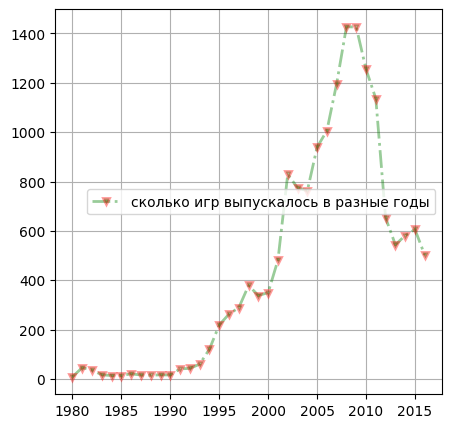

In [27]:
data_year = data.pivot_table(index="year_of_release", values=["name"], aggfunc="count")
plt.figure(figsize=(5, 5))
plt.plot(data_year, 'v-.g', alpha=0.4, label="сколько игр выпускалось в разные годы", 
         lw=2, mec='r', mew=2, ms=5)
plt.legend()
plt.grid(True)

* До 1995 года выпускалось слишком мало игр. Их можно отброосить.
* Пик продаж пришелся на 2005-2011. Больше всего было продано в 2008-2009 годах

In [28]:
data = data[data['year_of_release'] > 1994]

Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

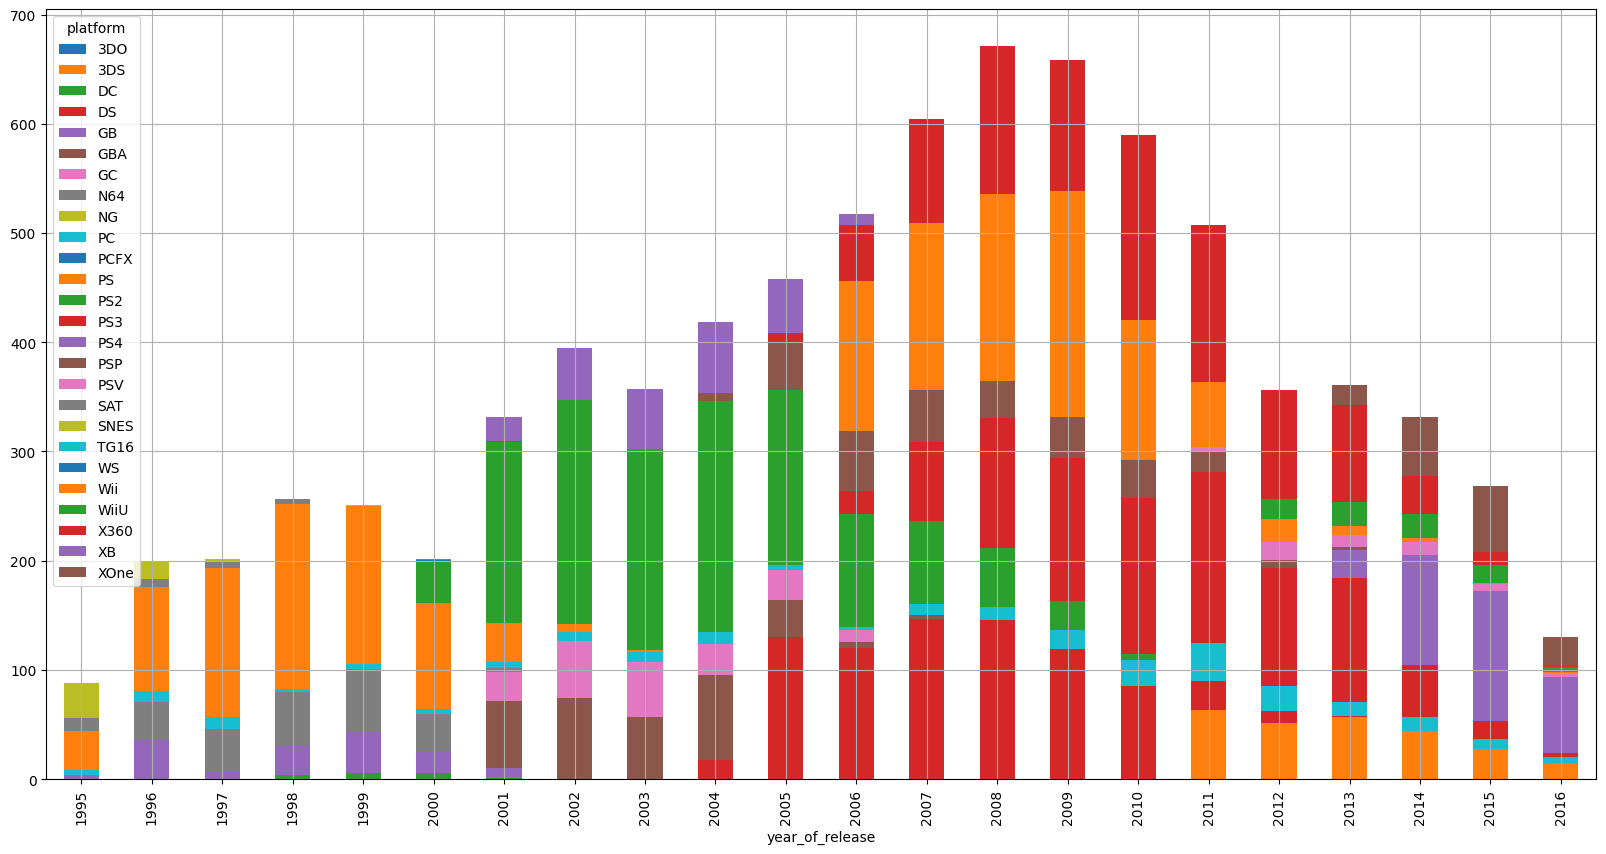

In [29]:
data.pivot_table(index="year_of_release", columns="platform", 
                 values="word_sales", aggfunc="sum").plot.bar(stacked=True, figsize=(20, 10), grid=True);


* Новые платформы повяются примерно каждые пять лет, старые изчезают примерно через один, два года после появления новых

Возьмем данные за соответствующий актуальный период. Основной фактор — эти данные помогут построить прогноз на 2017 год. С 2012 по 2016 (за 2016 данные не полные, новых платформ не появилось, но пропорция сохраняется)

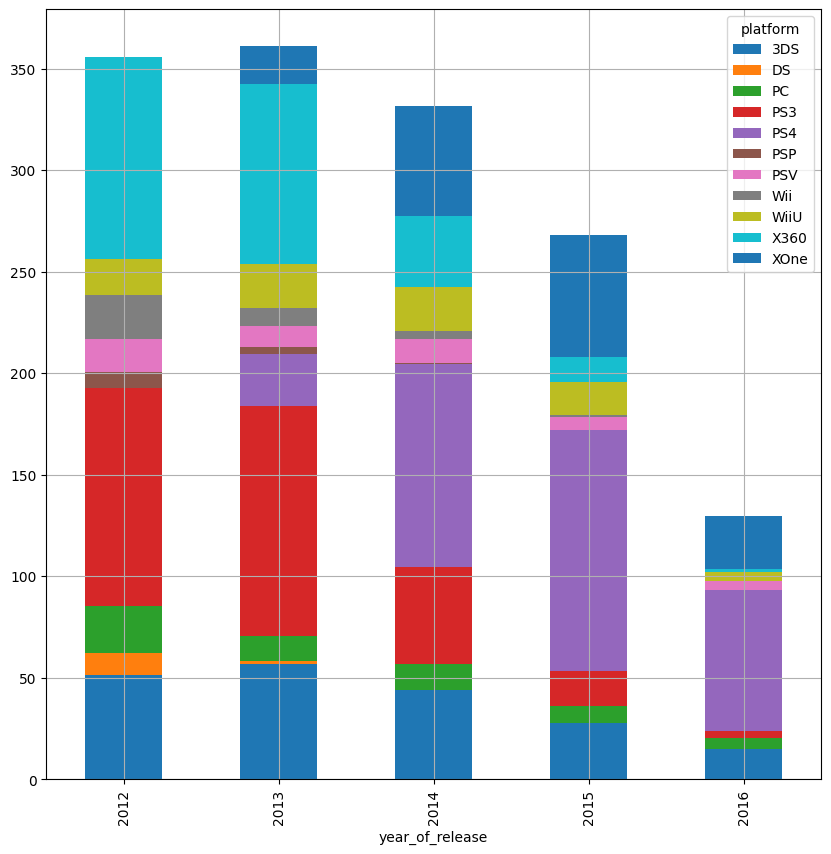

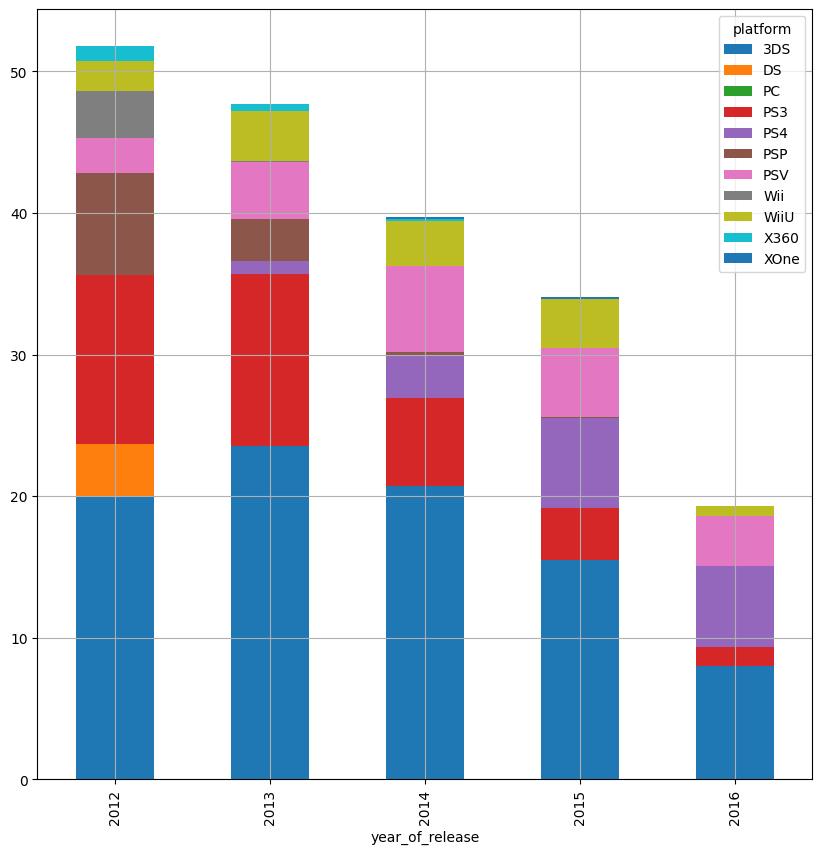

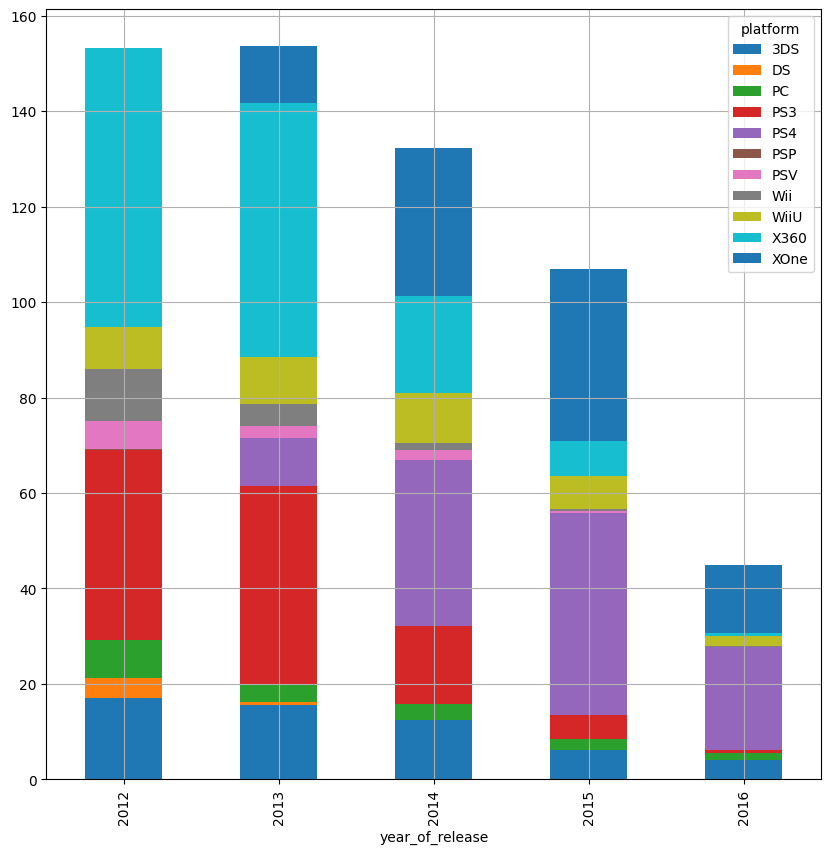

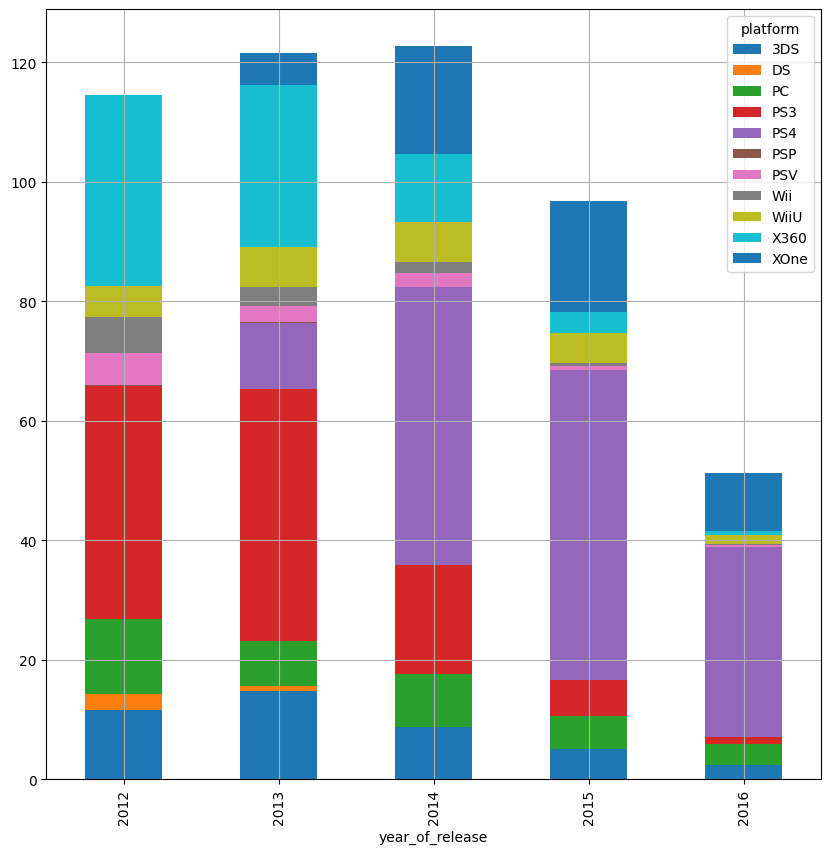

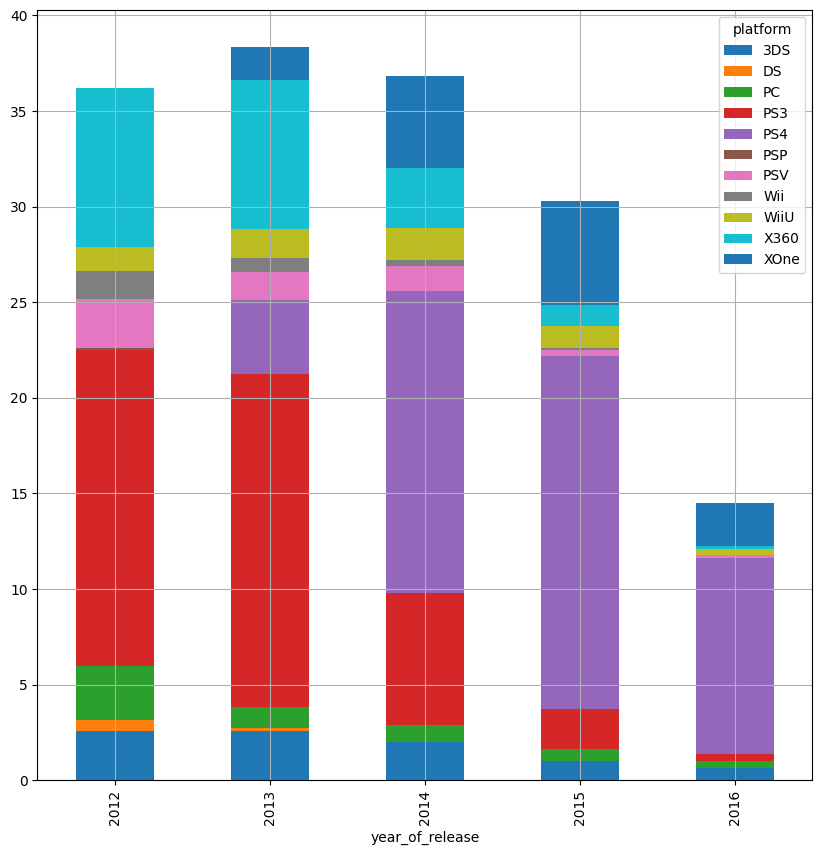

In [30]:
data_topical = data.query('year_of_release > 2011 and year_of_release < 2017')#актуальный период
data_topical.pivot_table(index="year_of_release", 
columns="platform", values="word_sales", aggfunc="sum").plot.bar(stacked=True, figsize=(10, 10), grid=True);
data_topical.pivot_table(index="year_of_release", 
columns="platform", values="jp_sales", aggfunc="sum").plot.bar(stacked=True, figsize=(10, 10), grid=True);
data_topical.pivot_table(index="year_of_release", 
columns="platform", values="na_sales", aggfunc="sum").plot.bar(stacked=True, figsize=(10, 10), grid=True);
data_topical.pivot_table(index="year_of_release", 
columns="platform", values="eu_sales", aggfunc="sum").plot.bar(stacked=True, figsize=(10, 10), grid=True);
data_topical.pivot_table(index="year_of_release", 
columns="platform", values="other_sales", aggfunc="sum").plot.bar(stacked=True, figsize=(10, 10), grid=True);

In [31]:
data_topical.pivot_table(index="year_of_release", 
columns="platform", values="word_sales", aggfunc="sum")

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


* Лидируют по продажам PS4, XOne появилась в 2013 году и набирает популярность. У остальных продажи падают. Общая тенденция к сокращению продаж копии.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишим результат.

(0.0, 3.0)

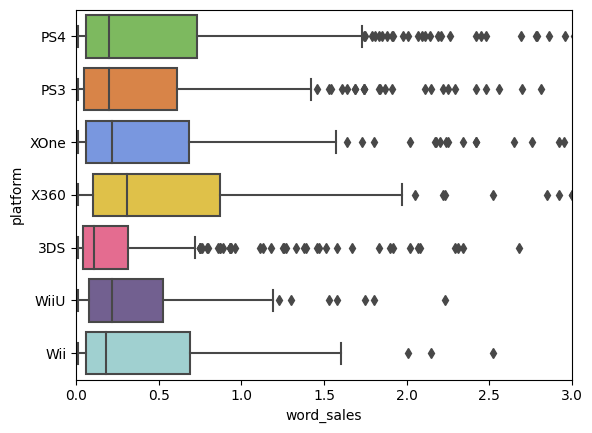

In [32]:
colors = ['#78C850', '#F08030', '#6890F0','#F8D030', '#F85888', '#705898', '#98D8D8'] # цвета
sns.boxplot(x=data_topical["word_sales"], y=data_topical["platform"], 
            palette=colors, order=["PS4", "PS3", "XOne",  "X360", "3DS", "WiiU", 'Wii']);
plt.xlim(0,3) 
# указали цвета и очередность по количествам продаж

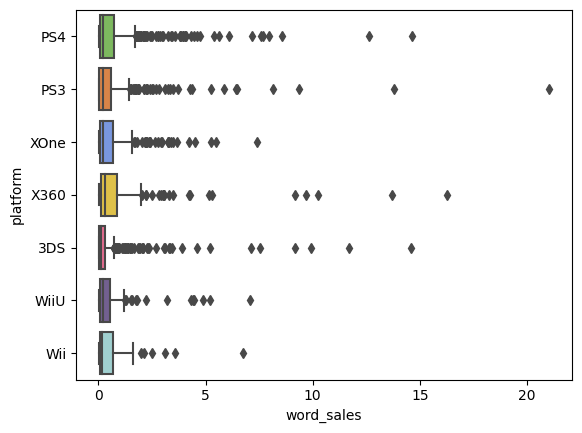

In [33]:
colors = ['#78C850', '#F08030', '#6890F0','#F8D030', '#F85888', '#705898', '#98D8D8'] # цвета
sns.boxplot(x=data_topical["word_sales"], y=data_topical["platform"], 
            palette=colors, order=["PS4", "PS3", "XOne",  "X360", "3DS", "WiiU", 'Wii']);
# указали цвета и очередность по количествам продаж

* У PS3 и PS4 одинаковые медиальные значения. Продажи им сделали 4 - 6 игр. 
* X360 аналогичная ситуация, но среднее медиальное больше
* XOne менее всего выбросов. Более равномерное распределение и медеальное чуть меньше X360
* 3 DS несколько игр которые сделали продажи платформе. Притом довольно малое медиальное значение
* WiiU и Wii есть несколько игр, за счет чего выбивается из средних показателей

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

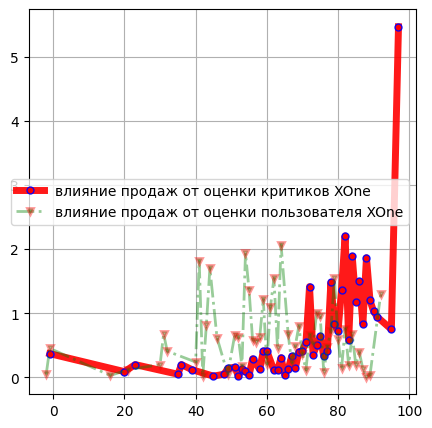

In [34]:
data_XOne = data_topical[data_topical['platform'] == 'XOne'].groupby('user_score')['word_sales'].mean()
data_XOne2 = data_topical[data_topical['platform'] == 'XOne'].groupby('critic_score')['word_sales'].mean()
plt.figure(figsize=(5, 5))
plt.plot(data_XOne2, 'o-r', alpha=0.9, label="влияние продаж от оценки критиков XOne", 
         lw=5, mec='b', mew=1, ms=5)
plt.plot(data_XOne, 'v-.g', alpha=0.4, label="влияние продаж от оценки пользователя XOne", 
         lw=2, mec='r', mew=2, ms=5)
plt.legend()
plt.grid(True)

* Для платформы XOne зависимость от оценки критиков появляется только для оценок больше 60, с ростом оценки увеличивается объем продаж
* Оценка пользователей не оказывает влияние на продажи

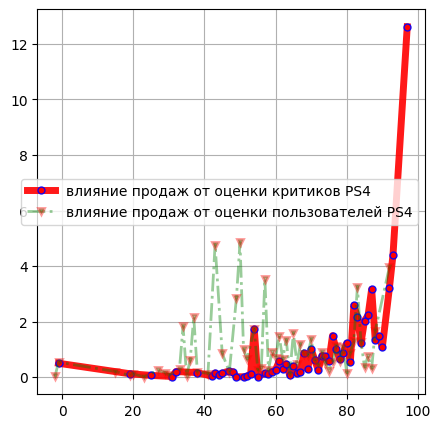

In [35]:
data_PS4 = data_topical[data_topical['platform'] == 'PS4'].groupby('user_score')['word_sales'].mean()
data_PS4_2 = data_topical[data_topical['platform'] == 'PS4'].groupby('critic_score')['word_sales'].mean()
plt.figure(figsize=(5, 5))
plt.plot(data_PS4_2, 'o-r', alpha=0.9, label="влияние продаж от оценки критиков PS4", 
         lw=5, mec='b', mew=1, ms=5)
plt.plot(data_PS4, 'v-.g', alpha=0.4, label="влияние продаж от оценки пользователей PS4", 
         lw=2, mec='r', mew=2, ms=5)
plt.legend()
plt.grid(True)

* Аналогично с платформой XOne
* Можно отбросить данные по которым рейтинг или не определен или отсутствует, затем помотреть корреляцию

In [36]:
p_data = data_topical[data_topical['user_score'] > 0] # без пропусков в оценках пользователей
p_data = p_data[p_data['critic_score'] > 0]# без пропусков в оценках пользователей

In [37]:
p_data['user_score'].corr(p_data['word_sales'])

0.0005966665040502929

* Отсутствует зависимость от оценки пользователей количество проданных копий

In [38]:
p_data['critic_score'].corr(p_data['word_sales'])

0.30651579412925023

* Присутствует слабая зависимость от оценки критиков количество проданных копий

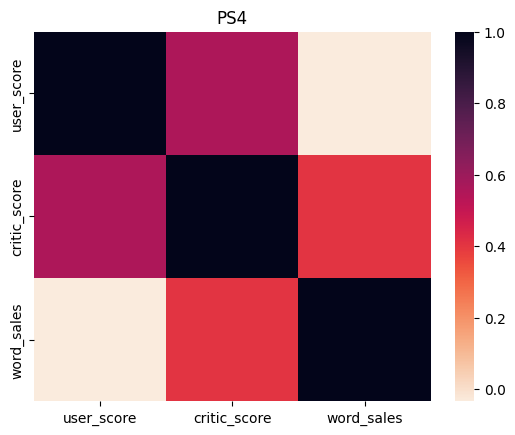

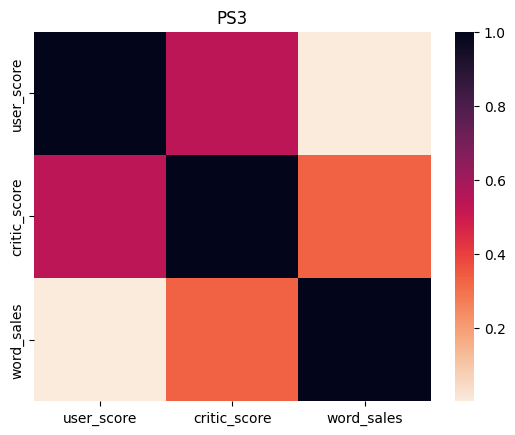

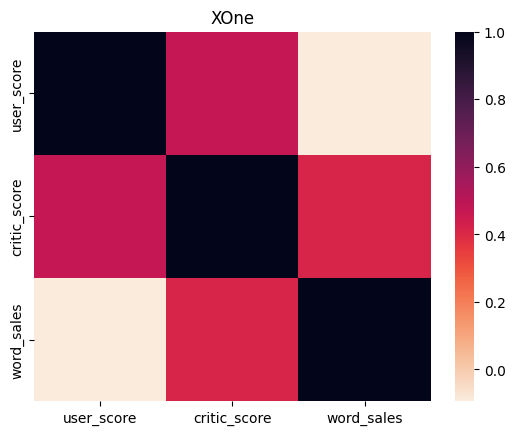

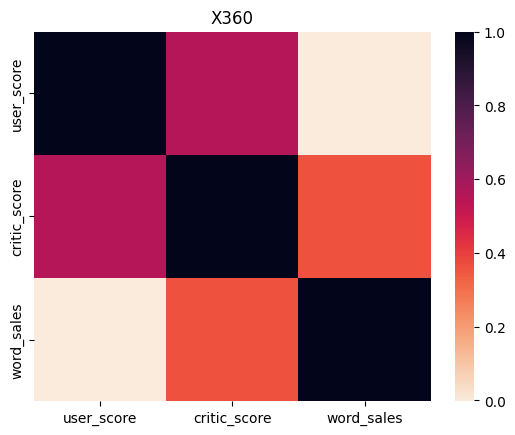

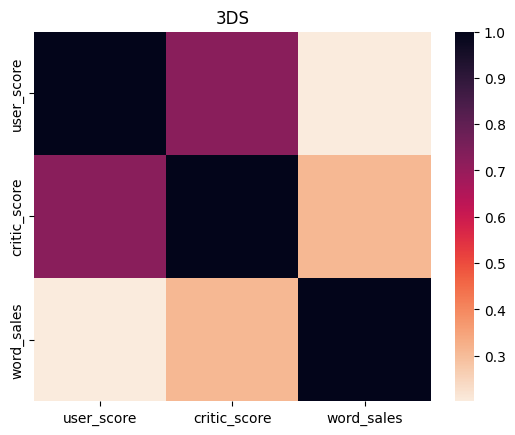

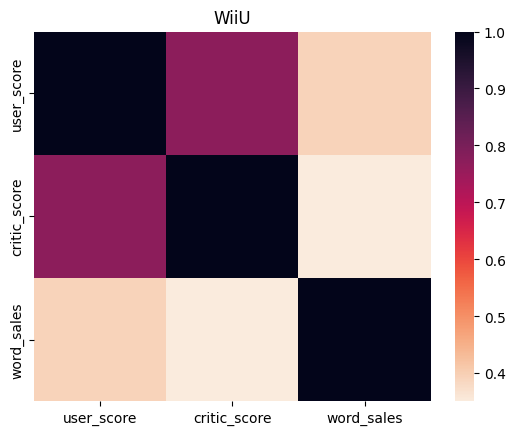

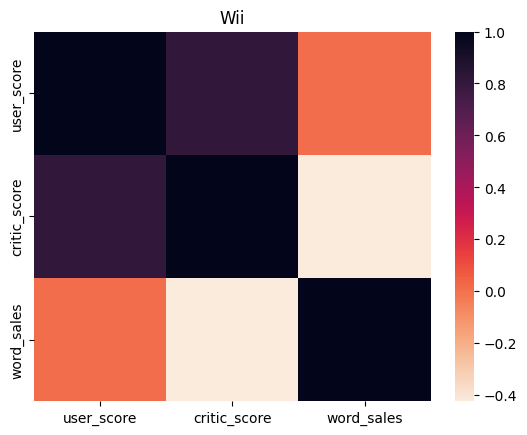

In [39]:
#Проверим для каждой из платформ зависимость корреляции
platforms = ["PS4", "PS3", "XOne",  "X360", "3DS", "WiiU", 'Wii']
n_platforms = len(platforms)

# список столбцов, по которым хотим построить корреляцию
cols = ["user_score", "critic_score", "word_sales"]

# отрисовываем для каждой платформы
for platform in platforms:
    # отбираем все строки для платформы 
    # и дропаем неинформативные записи среди отобранных
    q = p_data["platform"] == platform
    platform_df = p_data[q].dropna(subset=cols)
    
    # строим корреляции по выбранным столбцам
    correlations = platform_df[cols].corr()
    ax = sns.heatmap(correlations, cmap='rocket_r')
    ax.set_title(platform)
    plt.show()

(0.0, 6.0)

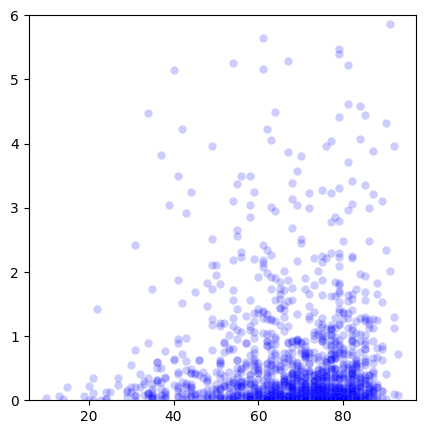

In [40]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(x = p_data['user_score'], y = p_data['word_sales'], 
           color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.2)
plt.ylim(0,6)

(0.0, 6.0)

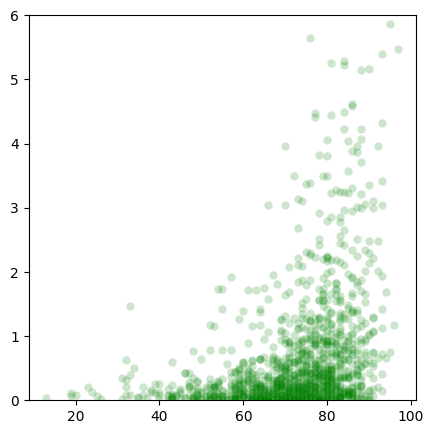

In [41]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(x = p_data['critic_score'], y = p_data['word_sales'], 
           color = "green", edgecolors = "white", linewidths = 0.1, alpha = 0.2)
plt.ylim(0,6)

### Сформулируем выводы.
* Присутствует слабая зависимость от оценки критиков количество проданных копий для каждой платформы
* Большинство оценок раполагается в диапозоне от 40 до 90
* Отстствует зависимость от оценке пользователей

### Соотнесите выводы с продажами игр на других платформах.
* Выше я рассматривал корреляцию по платформам
* Рассмотрим заисимость продаж от платформы 

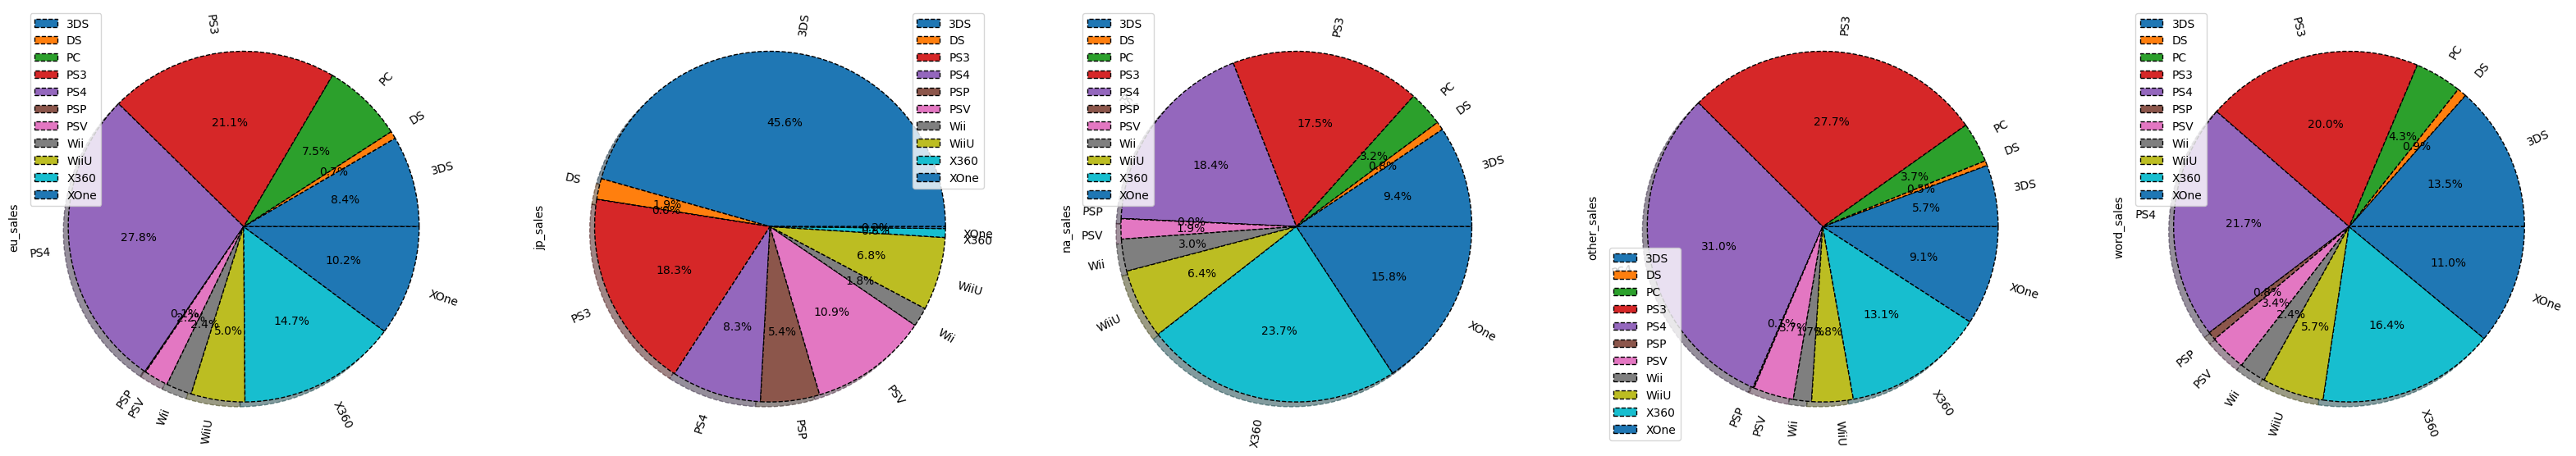

In [42]:
df = data_topical.pivot_table(index="platform", 
                              values=["eu_sales", "jp_sales", "na_sales", 
                                      "other_sales", "word_sales"], aggfunc="sum")
df.plot.pie(subplots=True, autopct='%1.1f%%', 
            shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, 
            rotatelabels=True, figsize=(40, 40));

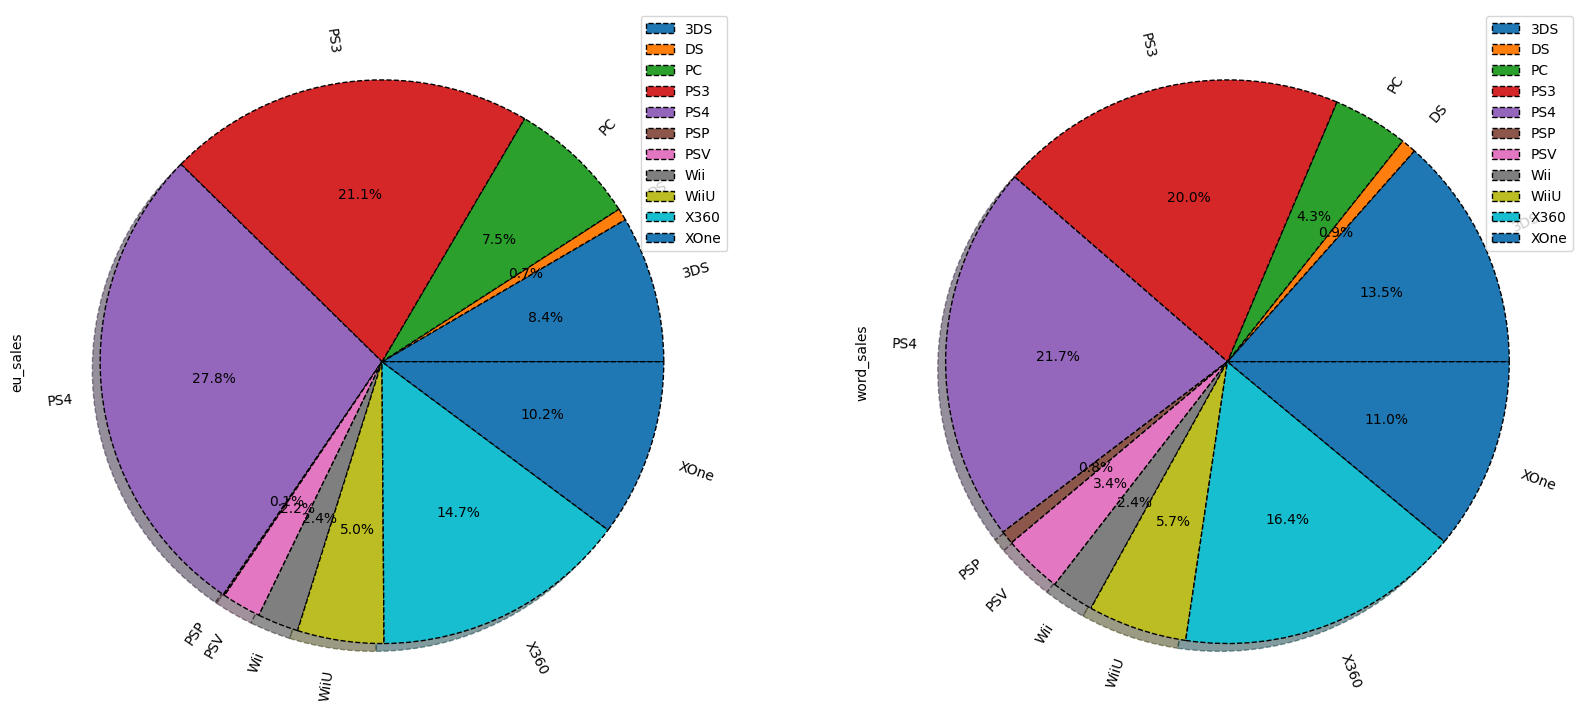

In [43]:
df = data_topical.pivot_table(index="platform", values=["eu_sales", "word_sales"], aggfunc="sum")
df.plot.pie(subplots=True, autopct='%1.1f%%', 
            shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, 
            rotatelabels=True, figsize=(20, 20));


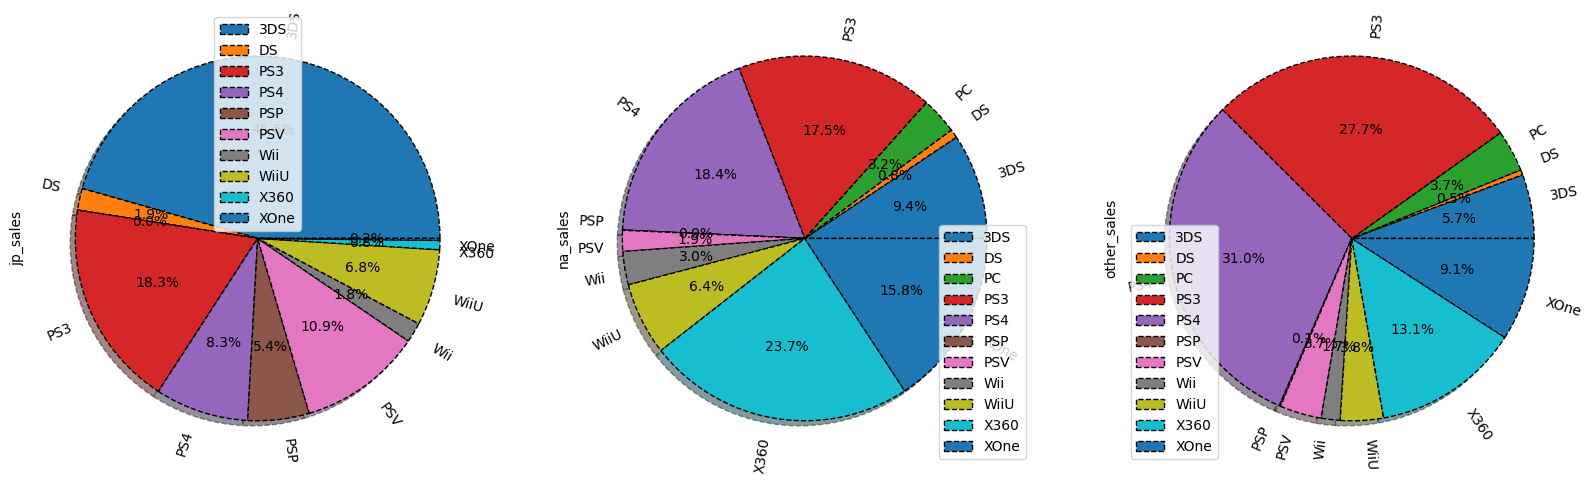

In [44]:
df = data_topical.pivot_table(index="platform", values=["jp_sales", "other_sales", "na_sales"], aggfunc="sum")
df.plot.pie(subplots=True, autopct='%1.1f%%', 
            shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, 
            rotatelabels=True, figsize=(20, 20));

* 1.1 Влияние на мировые продажи по платформам почти полностью соответствуют продажам в Европе. Самые популярные платформы PS4, PS3, X360, XOne, 3DS. Лидирует платформа марки PlayStation Японской компании
* 1.2 Самые популярные платформы в Северной Америке -X360, PS4, PS3, XOne, 3DS. Лидирует платформа марки X-box американской компании
* 1.3 Самые популярные платформы в Японии -3DS, PS3, PSV, PS4, PSP. Платформы Японских компании
* 1.4 Самые популярные платформы в Остальном мире - PS4, PS3, X360, XOne, 3DS.

### Посмотрим на общее распределение игр по жанрам.

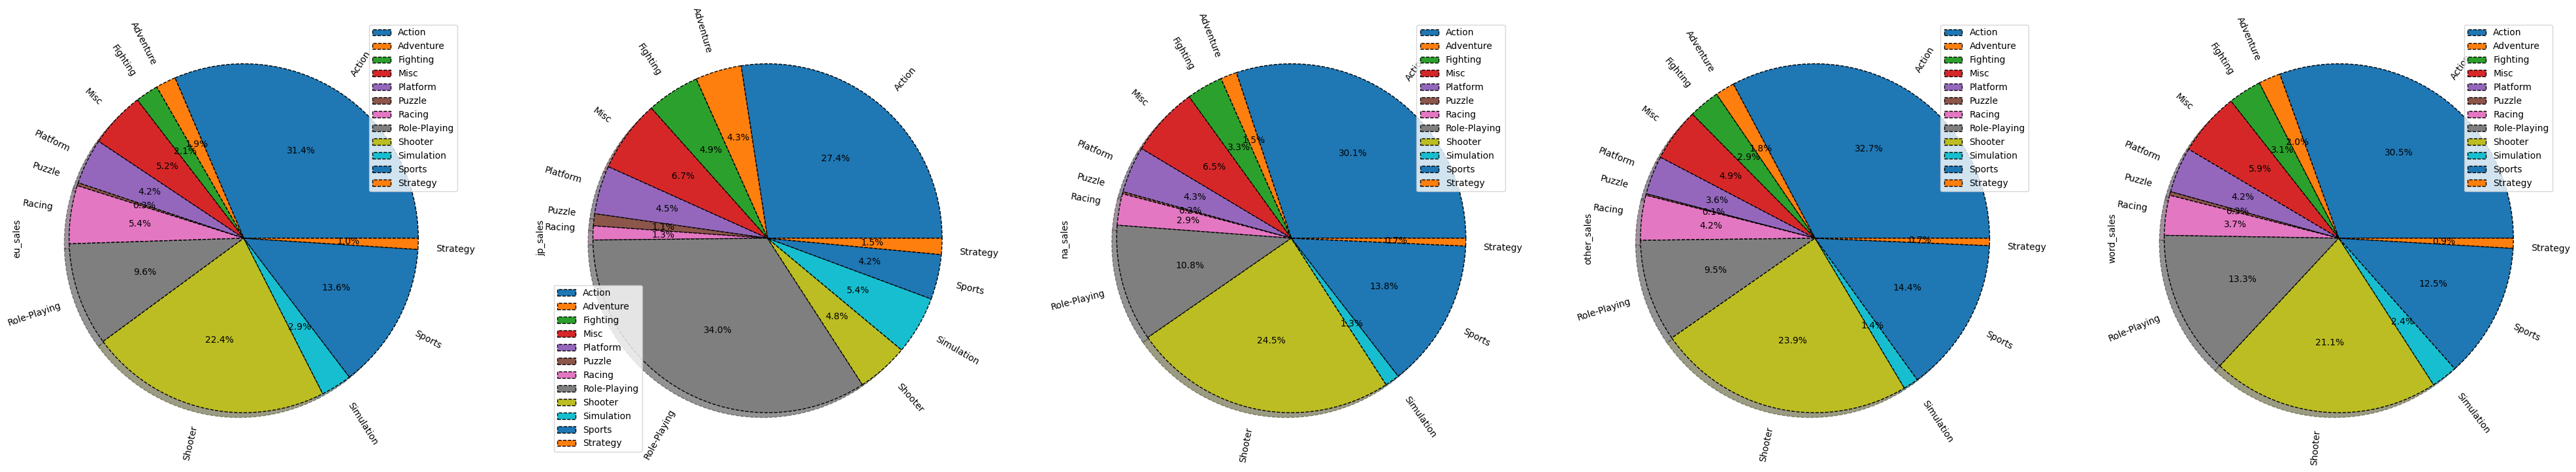

In [45]:
df = data_topical.pivot_table(index="genre", values=[ "jp_sales", "other_sales", "eu_sales", "na_sales", "word_sales"], aggfunc="sum")
df.plot.pie(subplots=True, autopct='%1.1f%%', 
            shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, 
            rotatelabels=True, figsize=(50, 50));

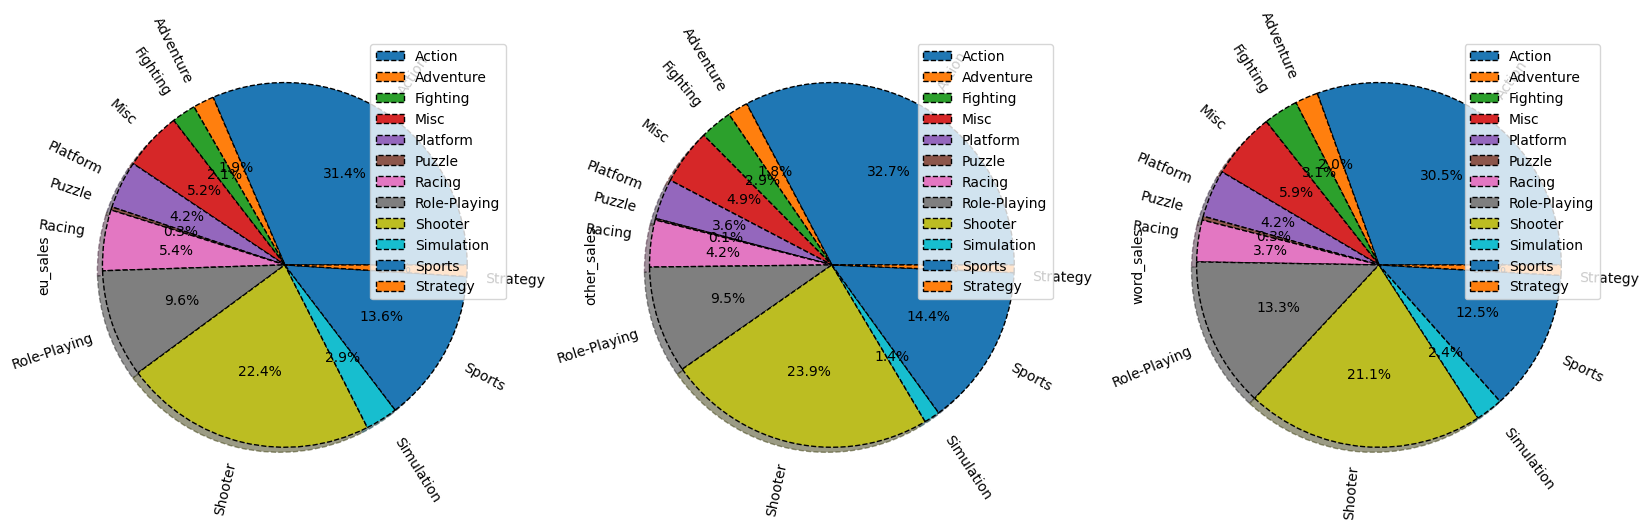

In [46]:
df = data_topical.pivot_table(index="genre", values=["other_sales", "eu_sales", "word_sales"], aggfunc="sum")
df.plot.pie(subplots=True, autopct='%1.1f%%', 
            shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, 
            rotatelabels=True, figsize=(20, 20));

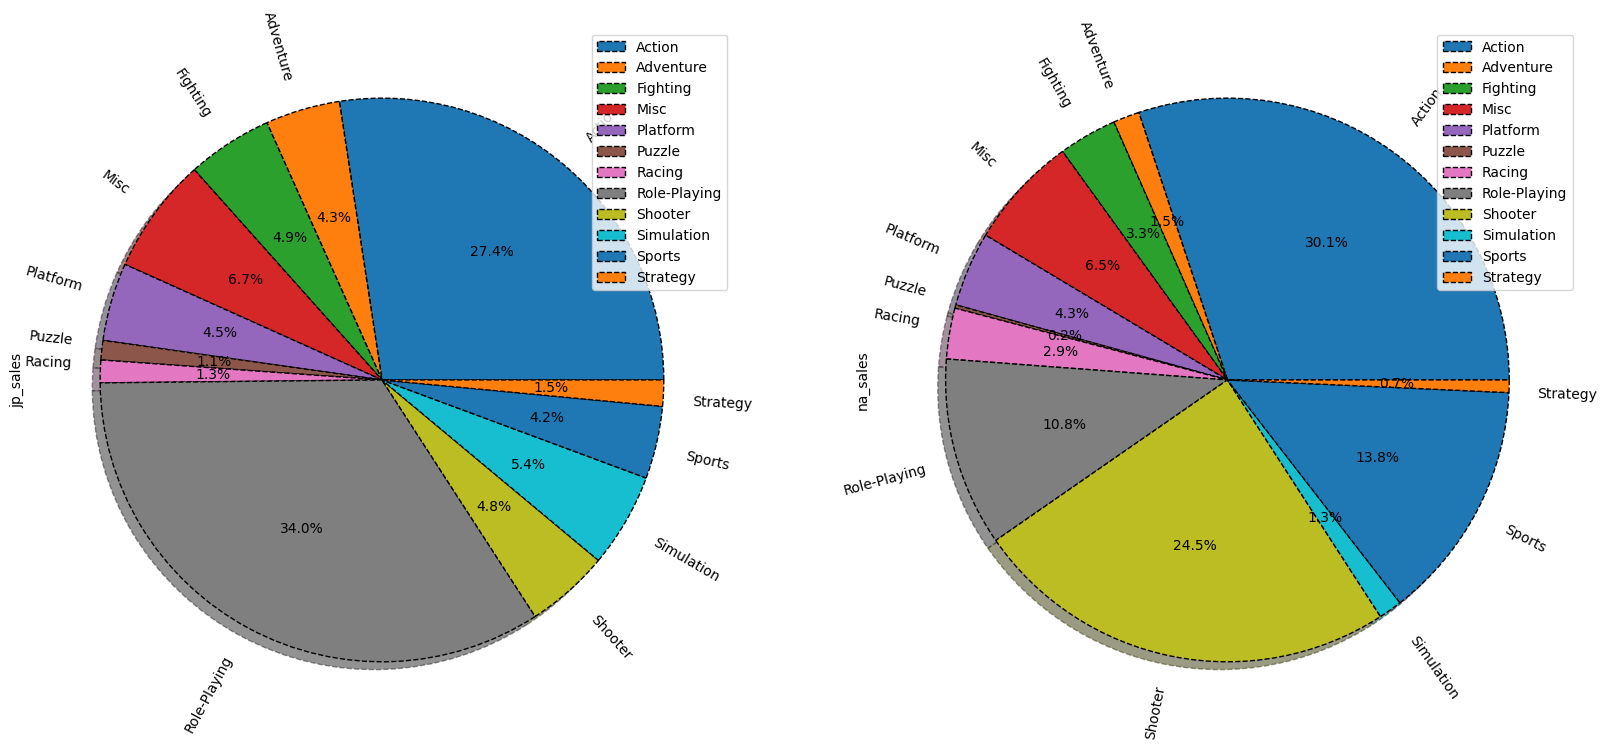

In [47]:
df = data_topical.pivot_table(index="genre", values=["jp_sales", "na_sales"], aggfunc="sum")
df.plot.pie(subplots=True, autopct='%1.1f%%', 
            shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, 
            rotatelabels=True, figsize=(20, 20));

### Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

* Как и на продажи по платформам, влияние больше всего оказывает Европа и Остальной мир. Где предпочитают жанр Sport и Action, Shooter. Игры от первого лица. Меньше всего Strategy, Adventure, Puzzle
* В Японии больше всего предпочитают Role-playing, Action, Misc, Fihting, Platform. Меньше всего Shooter, Racing, Strategy
* В Америке Action, Shooter, Sport, Role-playing, Misc. Меньше всего Puzzle, Strategy, Adventure

## Составим портрет пользователя каждого региона
* В предыдущем задании мы составили круговые графики по регионам от жанра, платформы. Обобщим результаты:
* 1.1 Влияние на мировые продажи по платформам почти полностью соответствуют продажам в Европе. Самые популярные платформы PS4, PS3, X360, XOne, 3DS.
* 1.2 Самые популярные платформы в Северной Америке -X360, PS4, PS3, XOne, 3DS.
* 1.3 Самые популярные платформы в Японии -3DS, PS3, PSV, PS4, PSP
* 1.4 Самые популярные платформы в Остальном мире - PS4, PS3, X360, XOne, 3DS.
* 2.1 Самые популярные жанры в Европе и в Остальном мире - Action, Shooter, Sport, Role-Playing, Racing. Игры от первого лица
* 2.2 В Японии больше всего предпочитают Role-playing, Action, Misc, Fihting, Platform. Меньше всего Shooter, Racing
* 2.3 В Америке Action, Shooter, Sport, Role-playing, Misc. Меньше всего Puzzle, Strategy, Adventure
* 3 Рассмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе. 
* 3.1 Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. Больше всего пропусков в рейтинге у игр которые продавались за пределами Севенй Америки, что логично. 

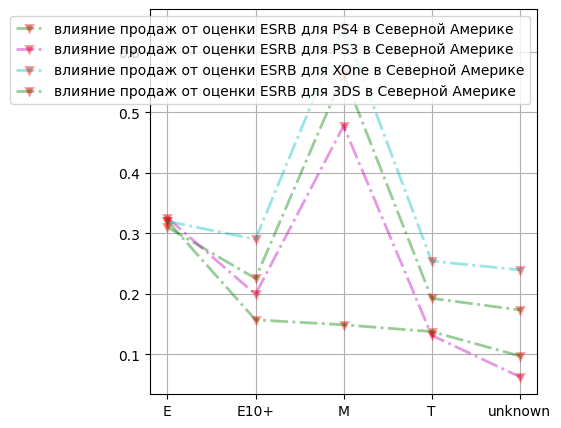

In [48]:
data_PS4 = data_topical[data_topical['platform'] == 'PS4'].groupby('rating')['na_sales'].mean()
data_PS3 = data_topical[data_topical['platform'] == 'PS3'].groupby('rating')['na_sales'].mean()
data_XOne = data_topical[data_topical['platform'] == 'XOne'].groupby('rating')['na_sales'].mean()
data_3DS = data_topical[data_topical['platform'] == '3DS'].groupby('rating')['na_sales'].mean()
plt.figure(figsize=(5, 5))
plt.plot(data_PS4, 'v-.g', alpha=0.4, label="влияние продаж от оценки ESRB для PS4 в Северной Америке", 
         lw=2, mec='r', mew=2, ms=5)
plt.plot(data_PS3, 'v-.m', alpha=0.4, label="влияние продаж от оценки ESRB для PS3 в Северной Америке", 
         lw=2, mec='r', mew=2, ms=5)
plt.plot(data_XOne, 'v-.c', alpha=0.4, label="влияние продаж от оценки ESRB для XOne в Северной Америке", 
         lw=2, mec='r', mew=2, ms=5)
plt.plot(data_3DS, 'v-.g', alpha=0.4, label="влияние продаж от оценки ESRB для 3DS в Северной Америке", 
         lw=2, mec='r', mew=2, ms=5)
plt.legend()
plt.grid(True)



* 3.2 Рейтинг ESRB влияет на продажи игр. Больше всего игр покупают для взрослых с рейтингом "М". Затем идет для всех "Е". Потом для старше 10 "Е10+". Только потом для подростков "Т". Исключение платформа 3 DS у нее мало игр для взрослых. Анализируем только данные по Северной Америке.

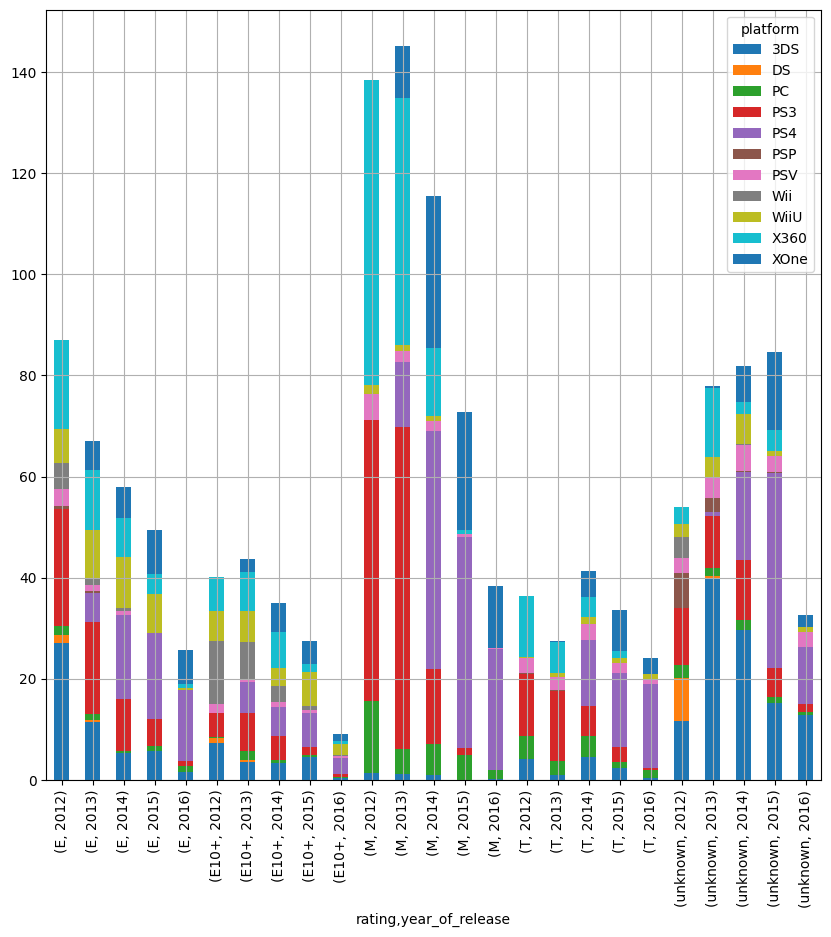

In [49]:
data_topical #актуальный период
data_topical.pivot_table(index=["rating", "year_of_release"], 
columns="platform", values="word_sales", aggfunc="sum").plot.bar(stacked=True, figsize=(10, 10), grid=True,);
# Количество продаж от оценки по годам за актуальный период в Мире

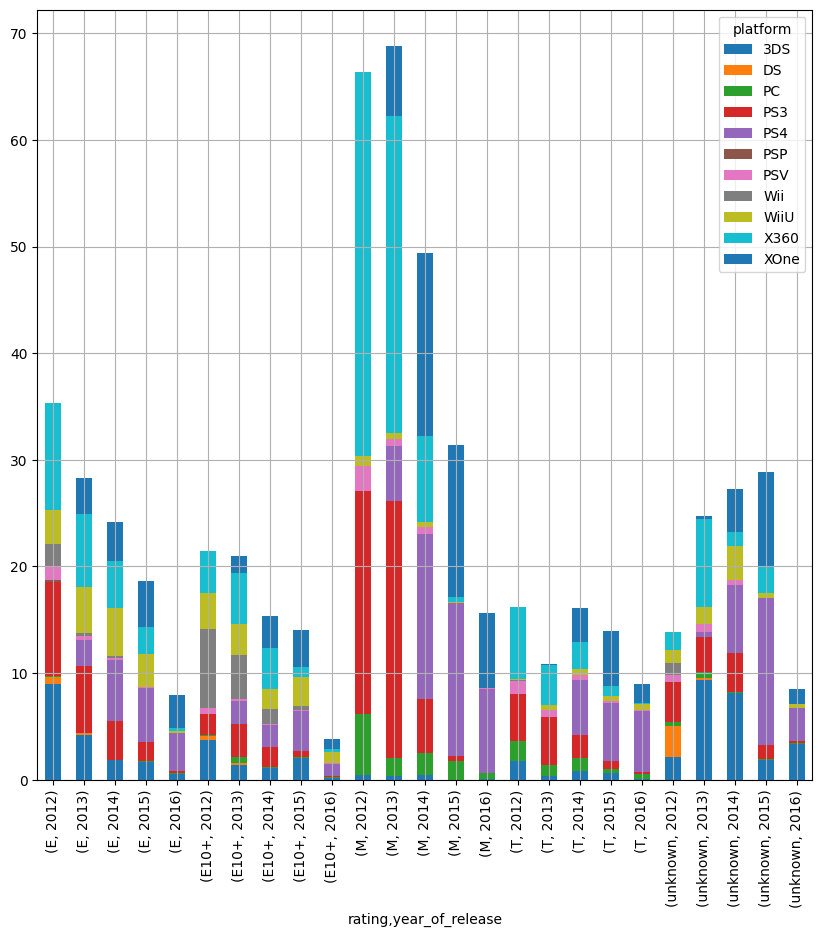

In [50]:
data_topical.pivot_table(index=["rating", "year_of_release"], 
columns="platform", values="na_sales", aggfunc="sum").plot.bar(stacked=True, figsize=(10, 10), grid=True);
# Количество продаж от оценки по годам за актуальный период в Северной Америке


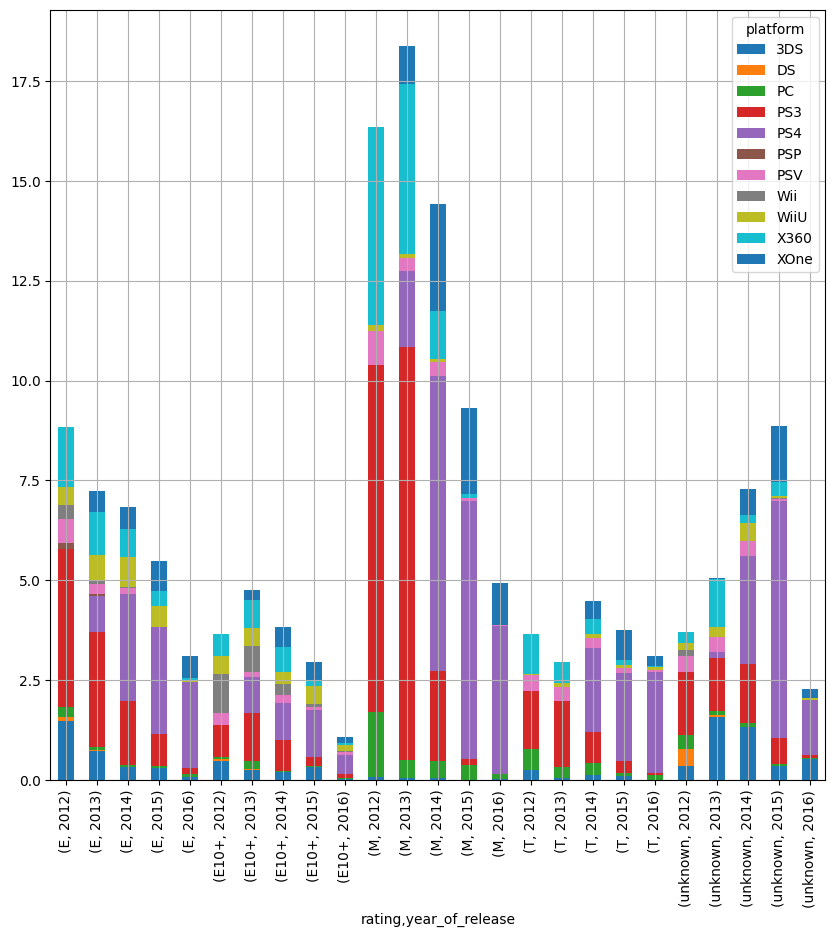

In [51]:
data_topical.pivot_table(index=["rating", "year_of_release"], 
columns="platform", values="other_sales", aggfunc="sum").plot.bar(stacked=True, figsize=(10, 10), grid=True);
# Количество продаж от оценки по годам за актуальный период в Остальном мире

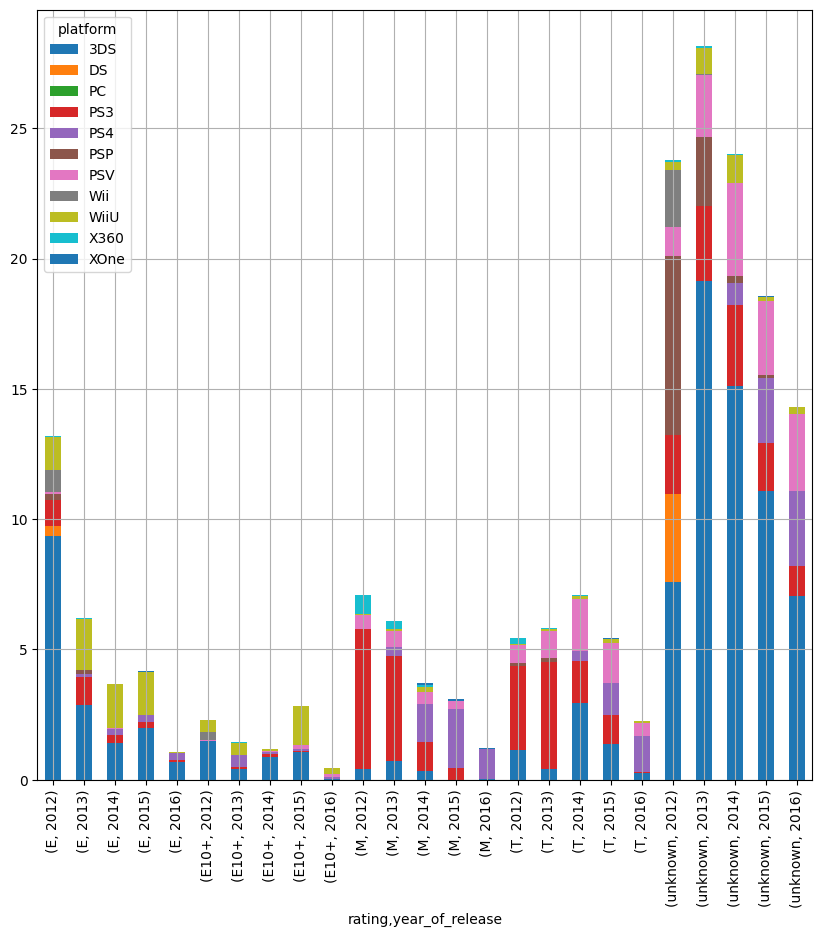

In [52]:
data_topical.pivot_table(index=["rating", "year_of_release"], 
columns="platform", values="jp_sales", aggfunc="sum").plot.bar(stacked=True, figsize=(10, 10), grid=True);
# Количество продаж от оценки по годам за актуальный период в Японии

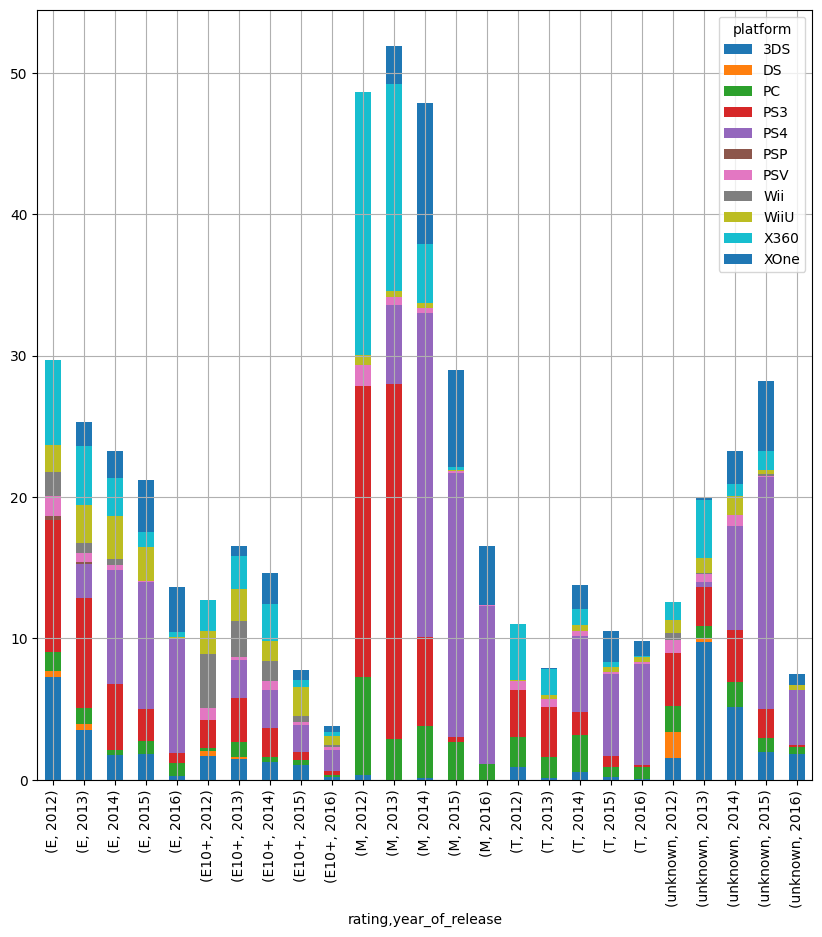

In [53]:
data_topical.pivot_table(index=["rating", "year_of_release"], 
columns="platform", values="eu_sales", aggfunc="sum").plot.bar(stacked=True, figsize=(10, 10), grid=True);
# Количество продаж от оценки по годам за актуальный период в Европе

* 3.2 Рейтинг ESRB влияет на продажи игр. Больше всего игр покупают для взрослых с рейтингом "М". Затем идет для всех "Е". Потом для старше 10 "Е10+". Только потом для подростков "Т". Для Северной Америке 
* ДЛя остального мира, европы похожая тенденци. Но на результат может оказать влияния отсутствия рейтинга у многих игр.
* не рассматриваем данные по Японии, т.к. количество игр без оценок ESRB там слишком велико. Что может исказить реультаты.


## Проверим гипотезы

In [54]:
from scipy import stats as st

* H_0: Средние пользовательские рейтинги платформ Xbox One = Средние пользовательские рейтинги платформ PC
* H_a: Средние пользовательские рейтинги платформ Xbox One ≠ Средние пользовательские рейтинги платформ PC
* alpha = 0.05

In [55]:
alpha = .05
#создадим соответствующие переменные
platform_XOne = p_data[(p_data['platform'] == 'XOne')]['user_score']
platform_PC = p_data[(p_data['platform'] == 'PC')]['user_score']
#проводим тест
results = st.ttest_ind(platform_XOne.dropna(), platform_PC.dropna(), equal_var=False)
print(results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")# условный оператор с выводом строки с ответом

0.5926561176517504
Не получилось отвергнуть нулевую гипотезу


* H_0: Средние пользовательские рейтинги жанров Action = Средние пользовательские рейтинги жанров Sports
* H_a: Средние пользовательские рейтинги жанров Action ≠ Средние пользовательские рейтинги жанров Sports
* alpha = 0.05

In [56]:
alpha = .05
#создадим соответствующие переменные
genre_action = p_data[(p_data['genre'] == 'Action')]['user_score']
genre_sport = p_data[(p_data['genre'] == 'Sports')]['user_score']
#проводим тест
results = st.ttest_ind(genre_action, genre_sport, equal_var=False)
print(results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")# условный оператор с выводом строки с ответом

5.858072645452818e-14
Отвергаем нулевую гипотезу


### Какой критерий применили для проверки гипотез и почему.
Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применили метод scipy.stats.ttest_ind()

## Общий вывод
В цели задачи мы ставили выявить определяющие успешность игры закономерности. Что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
* 1.1 Влияние на мировые продажи по платформам почти полностью соответствуют продажам в Европе. Самые популярные платформы PS4, PS3, X360, XOne, 3DS. Лидирует платформа марки PlayStation Японской компании
* 1.2 Самые популярные платформы в Северной Америке -X360, PS4, PS3, XOne, 3DS. Лидирует платформа марки X-box американской компании
* 1.3 Самые популярные платформы в Японии -3DS, PS3, PSV, PS4, PSP. Платформы Японских компании
* 1.4 Самые популярные платформы в Остальном мире - PS4, PS3, X360, XOne, 3DS.

* 2.1 C хорошей оценкой критиков выше 80. 
* 2.2 Европа и Остальной мир предпочитают жанр Sport и Action, Shooter.
* 2.3 В Японии больше всего предпочитают Role-playing, Action, Misc, Fihting, Platform. Меньше всего Shooter, Racing, Strategy
* 2.4 В Америке Action, Shooter, Sport, Role-playing, Misc. 

* С рейтингом ESRB для всех "М", кроме Японии.
* Также проверили две гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One = Средние пользовательские рейтинги платформ PC (Не получилось отвергнуть гипотезу)
2. Средние пользовательские рейтинги жанров Action = Средние пользовательские рейтинги жанров Sports (Отвергаем нулевую гипотезу)

## Количество продаж в мире по годам и платформам bar_chart_race

In [58]:
pip install bar_chart_race


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 760.3 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [60]:
import bar_chart_race as bcr


In [61]:
df = data.pivot_table(index="year_of_release", columns="platform", 
                 values="word_sales", aggfunc="sum")

df.fillna(0, inplace=True)
df.sort_values(list(df.columns),inplace=True)
df = df.sort_index()
df.iloc[:, 0:-1] = df.iloc[:, 0:-1].cumsum()
best_platforms = set()

for index, row in df.iterrows():
    best_platforms |= set(row[row > 0].sort_values(ascending=False).head(6).index)

bcr.bar_chart_race(df = df, 
                   n_bars = 6, 
                   sort='desc',
                   title='Best Platforms by Year',
                   fixed_max=True,
                   steps_per_period=20,
                   period_length=1500,
                   filter_column_colors=True)

/home/aleksey/anaconda3/lib/python3.10/site-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/home/aleksey/anaconda3/lib/python3.10/site-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))
